### This script is used to extract and store images from batch, and build training and testing set

### Traing data are stored at ./train_*_*.npy
### Test data are stored at ./test_*.npy

###  I will use this data set to replicate the model structure from the paper below:
### http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks

In [1]:
import os
import sys
import tarfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from six.moves import urllib
from tensorflow.python.framework import ops
import tarfile
import _pickle as cPickle
import scipy.misc
ops.reset_default_graph()

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cifar_url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
data_dir = 'cifar10'
if not os.path.isdir(data_dir):
    os.makedirs(data_dir)

# Download tar file
target_file = os.path.join(data_dir, 'cifar-10-python.tar.gz')
if not os.path.isfile(target_file):
    print('cifar file not found. Begine to download files')
    filename, headers = urllib.request.urlretrieve(cifar_url, target_file)
else:
    print('File already exist')


File already exist


In [3]:
tar = tarfile.open(target_file)
tar.extractall(path = data_dir)
tar.close()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
train_dir = os.path.join(data_dir, 'training_set')
test_dir = os.path.join(data_dir, 'test_set')

if not os.path.isdir(train_dir):
    print('Generate training set dir')
    os.makedirs(train_dir)
    for i in range(len(labels)):
        os.makedirs(os.path.join(train_dir, labels[i]))
else:
    print('Training set dir already exist')

if not os.path.isdir(test_dir):
    print('Generate test set dir')
    os.makedirs(test_dir)
    for i in range(len(labels)):
        os.makedirs(os.path.join(test_dir, labels[i]))
else:
    print('Test set dir already exist')

Training set dir already exist
Test set dir already exist


In [5]:
batch_file_list = [os.path.join(data_dir, 'cifar-10-batches-py', 'data_batch_' + str(x+1)) for x in range(5)]
test_file_list = [os.path.join(data_dir, 'cifar-10-batches-py', 'test_batch')]

In [6]:
train_dir

'cifar10\\training_set'

In [7]:
def extract_images_from_batch(batch_file_list, target_dir):
    print('Target dir: ' + str(target_dir))
    for batch_file in batch_file_list:
        print('Processing: ' + str(batch_file))
        with open(batch_file, 'rb') as file:
            image_dict = cPickle.load(file, encoding = 'latin1')
        file.close()
        
        for i, label in enumerate(image_dict['labels']):
            target_file_name = image_dict['filenames'][i]
            target_file_dir = os.path.join(target_dir, labels[label], target_file_name)
            
            if not os.path.isfile(target_file_dir):
                target_data = image_dict['data'][i].reshape([3, 32, 32]).transpose()
                scipy.misc.imsave(target_file_dir, target_data)
    print('Done')

In [8]:
extract_images_from_batch(batch_file_list, train_dir)
extract_images_from_batch(test_file_list, test_dir)

Target dir: cifar10\training_set
Processing: cifar10\cifar-10-batches-py\data_batch_1
Processing: cifar10\cifar-10-batches-py\data_batch_2
Processing: cifar10\cifar-10-batches-py\data_batch_3
Processing: cifar10\cifar-10-batches-py\data_batch_4
Processing: cifar10\cifar-10-batches-py\data_batch_5
Done
Target dir: cifar10\test_set
Processing: cifar10\cifar-10-batches-py\test_batch
Done


### Take a look at sample images in each label

airplane


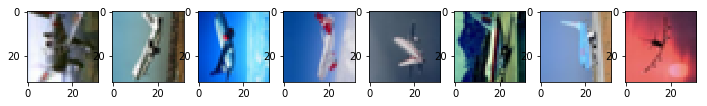

automobile


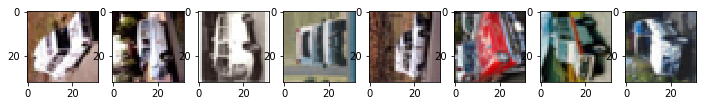

bird


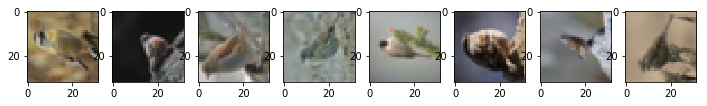

cat


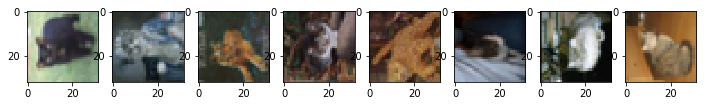

deer


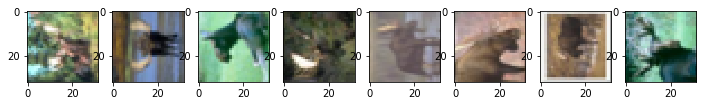

dog


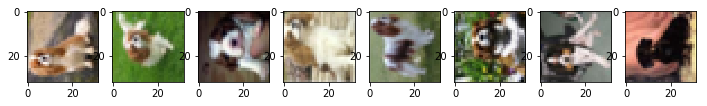

In [12]:
plt.rcParams["figure.figsize"] = [12,20
Ncols = 8
for i in range(6):
    print(labels[i])
    for j in range(Ncols):
        plt.subplot(1, Ncols, j+1)
        img=mpimg.imread(os.path.join(train_dir, labels[i], os.listdir(os.path.join(train_dir, labels[i]))[j]))
        imgplot = plt.imshow(img)
    
    plt.show()

In [10]:
def get_data_and_labels_from_batch(batch_file):
    with open(batch_file, 'rb') as file:
        image_dict = cPickle.load(file, encoding = 'latin1')
    file.close()
    image_data = [x.reshape([3, 32, 32]).transpose() for x in image_dict['data']]
    image_labels = image_dict['labels']
    #for i, label in enumerate(image_dict['data']):
    
    return image_data, image_labels

### save image data to np.array format

In [11]:
# save traning data
for i in range(5):
    train_x, train_y = get_data_and_labels_from_batch(batch_file_list[i])
    
    train_set = np.array(train_x)
    train_labels = np.array(train_y)
    
    output_dir_x = os.path.join(data_dir, 'train_x_' + str(i + 1))
    output_dir_y = os.path.join(data_dir, 'train_y_' + str(i + 1))
    
    np.save(output_dir_x, train_set)
    np.save(output_dir_y, train_labels)

In [14]:
# save test data
test_x, test_y = get_data_and_labels_from_batch(test_file_list[0])

test_set = np.array(test_x)
test_labels = np.array(test_y)

output_dir_x = os.path.join(data_dir, 'test_x_' + str(i + 1))
output_dir_y = os.path.join(data_dir, 'test_y_' + str(i + 1))

np.save(output_dir_x, test_set)
np.save(output_dir_y, test_labels)